# Further Analysis & Visualizations on Total Customer Data

### setting up

In [1]:
# importing modules

import pandas as pd
import numpy as np
import os
import janitor
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 

In [2]:
# importing data

path = r'/Users/johntam/cf_data_analysis/tasks/A4/code/clean_data'
total_data = pd.read_pickle(os.path.join(path,'final.pkl'))

### functions

In [282]:
# defining fucntions to make pie chart distributions

def generate_pie_chart(data, value_col, label_dict, title = None, colors=None, explode=None, title_offset = 1):
    
    subset = data.loc[:,['user_id',value_col]].drop_duplicates().dropna()
    counts = subset[value_col].value_counts()
    labels = [label_dict.get(i, str(i)) for i in counts.index]

    if colors is None:
        # Default color scheme
        colors = ['#60ab59', '#9bd99b', '#5c9a5d', '#6caa6c', '#7cb97c', '#8cc98b']

    if explode is None:
        # Default exploding behavior
        explode = [0.0] * len(counts)

    pie = counts.plot.pie(labels=labels, colors=colors, autopct='%1.f%%', startangle=90, label='', explode=explode)

    if title is None:
        plt.title(f"{value_col.title()} Distribution", fontsize='18', y = title_offset )
    else:
        plt.title(f"{title.title()} Distribution", fontsize='18', y = title_offset)

    return pie

In [352]:
# creating function to create stacked bar charts

def generate_stacked_bar_chart(data, factor, profile, label_dict, color=None, title=None, percentages='on'):
    
    subset = data.loc[:,['user_id',factor,profile]].drop_duplicates().dropna()
    crosstab = pd.crosstab(subset[factor], subset[profile], dropna=False)
    value_labels = [label_dict.get(i, str(i)) for i in crosstab.columns]

    if color is None:
        # Default color scheme
        color = ['#ff8200', '#ffa033', '#ffc566', '#ffe099', '#fff5cc', '#ffedcc']

    stacked_bar = crosstab.plot(kind='bar', stacked=True, color=color)
    stacked_bar.legend(title=profile.title(), bbox_to_anchor=(1.55, 1.0), loc='upper right', labels=value_labels, fontsize=8)
    plt.ylabel('Frequency')
    plt.xlabel(f"{factor.title()}")
    plt.xticks(rotation=0)

    # Set the y axis limit to increase the axis length
    #plt.ylim(0, 60000)

    if title is None:
        plt.title(f"{profile.title()} Distribution by {factor.title()}", fontsize='18')
    else:
        plt.title(f"{title.title()} Distribution by {factor.title()}", fontsize='18')

    # creating annotations of percentages
    total = crosstab.sum(axis=1)
    per = crosstab.div(total, axis=0).mul(100).round(1)

    if percentages == 'off':
        pass
    else: 
    # Iterate through the containers to get labels 
        for c in stacked_bar.containers:
            # Get the current segment label (a string); corresponds to column / legend
            label = int(c.get_label())
            # Create custom labels with the bar height and the percent from the per column
            # checking to see if percent value is greater than 1
            if per[label].max() > 2:
                labels = [f'{row}%' if row > 0 else '' for row in per[label]]
            else:
                labels = ['' for row in per[label]]
            # Add the annotation
            stacked_bar.bar_label(c, labels=labels, label_type='edge', fontsize=8)
            

    return stacked_bar

### filtering data

In [4]:
# removing PII data - first and last name 

total_data = total_data.drop(columns = ['first_name','surnam','_merge'], axis = 1)

In [5]:
# remvoing any cusotmers with less than 5 orders
# creating a new df (tdhr) which stands for total data high revenue 

tdhr = total_data[total_data['max_order'] > 4]

In [8]:
# exporting this sample

tdhr.to_pickle(os.path.join(path,'tdhr.pkl'))

In [369]:
sample = tdhr.loc[0:100]
pd.set_option('display.max_columns', None)
sample.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'average_price', 'spender_type', 'max_order', 'loyalty_flag',
       'median_day_since_ordered', 'customer_freq', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'household', 'age_gender', 'income_spender', 'pet_owner', 'vegetarian',
       'new_customer'],
      dtype='object')

### creating more analysis variables

In [9]:
## geographical region tag

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# creating new region column

tdhr.loc[tdhr['state'].isin(region_1_NE), 'region'] = 'northeast'
tdhr.loc[tdhr['state'].isin(region_2_MW), 'region'] = 'midwest'
tdhr.loc[tdhr['state'].isin(region_3_S), 'region'] = 'south'
tdhr.loc[tdhr['state'].isin(region_4_W), 'region'] = 'west'

/var/folders/6p/dg2x5f3j5clbf9xgg9xqfxjh0000gn/T/ipykernel_28094/2565650300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdhr.loc[tdhr['state'].isin(region_1_NE), 'region'] = 'northeast'


In [14]:
# checking if theres a difference in spending habits by percentage of high vs low spenders

pd.crosstab(tdhr['region'], tdhr['spender_type'], normalize = 'index', dropna = False)*100

spender_type,high spender,low spender
region,,
midwest,0.332457,99.667543
northeast,0.276834,99.723166
south,0.326129,99.673871
west,0.320351,99.679649


### creating & analyizing customer profiles

##### married status & n_dependents

In [17]:
# creating customer profiles

pd.crosstab(tdhr['fam_status'],tdhr['n_dependants'])


n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2647761,0,0,0
living with parents and siblings,0,508439,485157,489015
married,0,7217542,7255042,7290437
single,5099271,0,0,0


In [82]:
# creating data dictionary for profile column

household_dict = {
    0 : 'other',
    1 : 'divorced/widowed with no dependants',
    2 : 'single parent living with family',
    3 : 'married without children',
    4 : 'married with children',
    5 : 'single without children',
    6 : 'single parent'
}

In [ ]:
# creating profile column

conditions = [
    (tdhr['fam_status'] == 'divorced/widowed') & (tdhr['n_dependants'] == 0),
    (tdhr['fam_status'] == 'living with parents and siblings') & (tdhr['n_dependants'] > 0),
    (tdhr['fam_status'] == 'married') & (tdhr['n_dependants'] == 0),
    (tdhr['fam_status'] == 'married') & (tdhr['n_dependants'] > 0),
    (tdhr['fam_status'] == 'single') & (tdhr['n_dependants'] == 0),
    (tdhr['fam_status'] == 'single') & (tdhr['n_dependants'] > 0)
]

choices = [1,2,3,4,5,6]

tdhr['household'] = np.select(conditions, choices, default = 0)

In [24]:
#checking column

tdhr['household'].value_counts()

4    21763021
5     5099271
1     2647761
2     1482611
Name: household, dtype: int64

In [171]:
# usage frequency and prices summary statistics for profile

(tdhr
    .groupby('household')
    .agg({'prices': {'mean','max','min'},
          'days_since_prior_order': {'mean','max','min'}})
    .rename(index=household_dict, level='household')
    )

prices                  \
                                       min   max      mean   
household                                                    
divorced/widowed with no dependants    1.0  25.0  7.805999   
single parent living with family       1.0  25.0  7.805819   
married with children                  1.0  25.0  7.794894   
single without children                1.0  25.0  7.788485   

                                    days_since_prior_order                   
                                                       min   max       mean  
household                                                                    
divorced/widowed with no dependants                    0.0  30.0  10.750509  
single parent living with family                       0.0  30.0  10.750739  
married with children                                  0.0  30.0  10.821103  
single without children                                0.0  30.0  10.813173

** **

###### visualizations

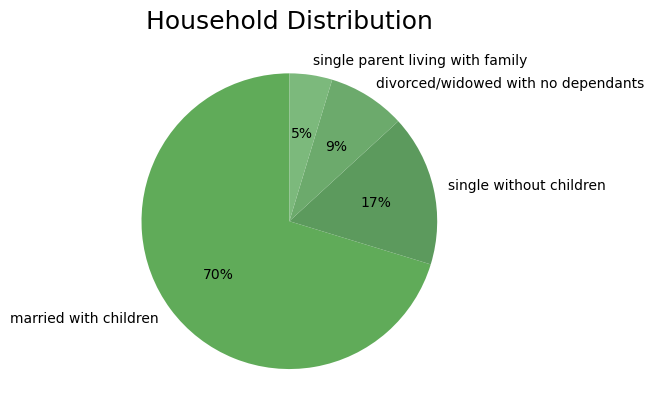

In [177]:
# creating pie chart to show profile distribution

household_pie = generate_pie_chart(tdhr, 'household', household_dict)

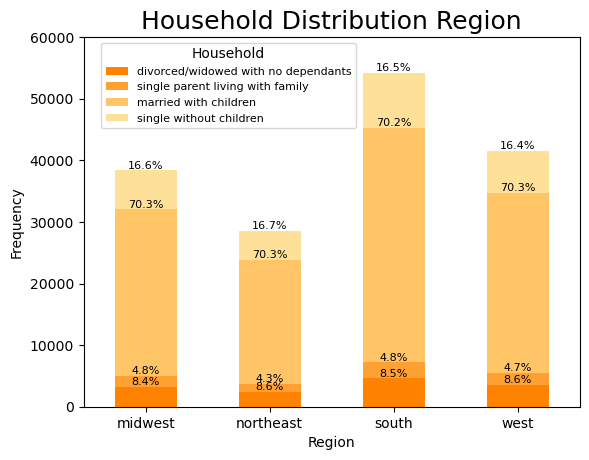

In [324]:
# creating stacked bar chart

household_stackedbar = generate_stacked_bar_chart(tdhr,'region','household',household_dict)

##### gender x age group

In [21]:
# exploring data

pd.crosstab(tdhr['gender'],tdhr['age'])

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,232575,243098,228518,242629,242954,243347,230059,220227,232958,238547,231388,247643,243071,262595,242209,235882,248551,255641,226291,241869,251973,239175,243695,220898,235519,244153,237363,248399,232492,229084,263856,250951,236506,247420,236274,233896,252983,251556,256428,231099,235834,248800,221597,232649,239608,247974,239861,231016,214212,225978,246824,254763,231012,232730,229025,269178,246655,247079,234871,242758,243330,267364,239873,235223
Male,246257,253535,252110,246920,248388,250069,257857,229623,257381,263032,233847,250059,244021,244029,232842,236901,236675,241341,234756,246131,241190,246486,240119,230774,249898,256068,257530,240113,240490,265484,243404,257285,232570,245137,244716,245615,245414,238716,243687,243029,244469,232349,240731,231316,234743,227346,265370,234111,240926,247082,254902,235176,249548,231121,251232,230592,230928,252667,242887,235731,228152,241481,253274,251045


In [23]:
# creating data dictionary

age_gender_dict = {
    0 : 'other',
    1 : 'young adult woman',
    2 : 'mid-aged woman',
    3 : 'elderly woman',
    4 : 'young adult man',
    5 : 'mid-aged man',
    6 : 'elderly man'
}

In [ ]:
# creating profile column

conditions = [
    (tdhr['gender'] == 'Female') & (tdhr['age'] >= 18) & (tdhr['age'] <= 39),
    (tdhr['gender'] == 'Female') & (tdhr['age'] >= 40) & (tdhr['age'] <= 64),
    (tdhr['gender'] == 'Female') & (tdhr['age'] > 64),
    (tdhr['gender'] == 'Male') & (tdhr['age'] >= 18) & (tdhr['age'] <= 39),
    (tdhr['gender'] == 'Male') & (tdhr['age'] >= 40) & (tdhr['age'] <= 64),
    (tdhr['gender'] == 'Male') & (tdhr['age'] > 0)
]

choices = [1,2,3,4,5,6]

tdhr['age_gender'] = np.select(conditions, choices, default = 0)

In [26]:
# checking column

tdhr['age_gender'].value_counts()

5    6096373
2    6018895
4    5393450
1    5281200
6    4110855
3    4091891
Name: age_gender, dtype: int64

In [169]:
# usage frequency and prices summary statistics for profile

(tdhr
    .groupby('age_gender')
    .agg({'prices': {'mean','max','min'},
          'days_since_prior_order': {'mean','max','min'}})
    .rename(index=age_gender_dict, level='age_gender')
    )

prices                 days_since_prior_order        \
                     min   max      mean                    min   max   
age_gender                                                              
young adult woman    1.0  25.0  7.789532                    0.0  30.0   
mid-aged woman       1.0  25.0  7.790915                    0.0  30.0   
elderly woman        1.0  25.0  7.800323                    0.0  30.0   
young adult man      1.0  25.0  7.789435                    0.0  30.0   
mid-aged man         1.0  25.0  7.801702                    0.0  30.0   
elderly man          1.0  25.0  7.802414                    0.0  30.0   

                              
                        mean  
age_gender                    
young adult woman  10.828459  
mid-aged woman     10.803839  
elderly woman      10.736765  
young adult man    10.794346  
mid-aged man       10.839931  
elderly man        10.847393

** **

###### visualizations

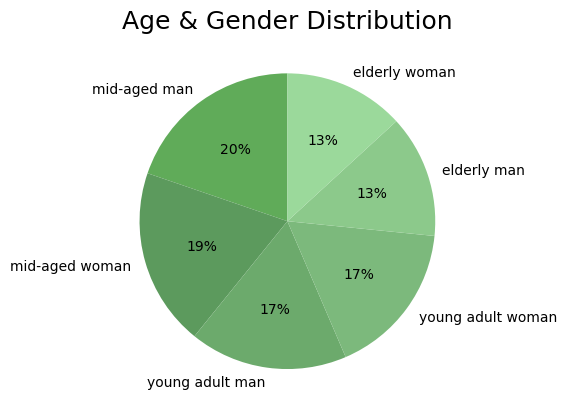

In [178]:
# creating pie chart to show profile distribution

age_gender_pie = generate_pie_chart(tdhr,'age_gender',age_gender_dict, title='Age & Gender')

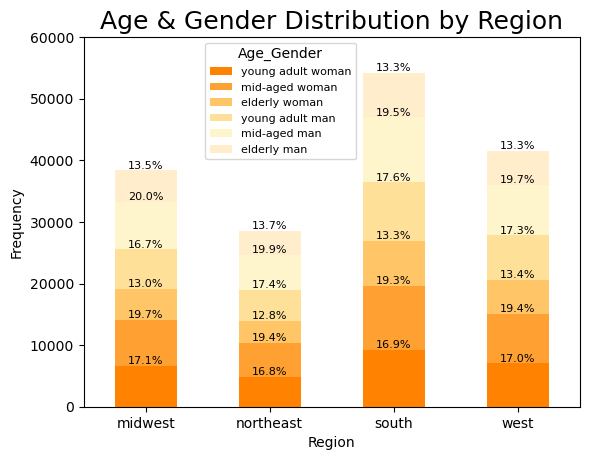

In [325]:
# creating stacked bar chart

age_gender_stackedbar = generate_stacked_bar_chart(tdhr,'region','age_gender',age_gender_dict,title = 'Age & Gender')

##### income x spender type

In [27]:
# exploring data

pd.crosstab(tdhr['income'], tdhr['spender_type'])

spender_type,high spender,low spender
income,,
25903,0,20
25911,0,28
25937,0,39
25941,0,31
25955,0,392
...,...,...
584097,0,826
590790,0,54
591089,0,176


In [28]:
# creating data dictionary

income_spender_dict = {
    0 : 'other',
    1 : 'high income high spender',
    2 : 'high income low spender',
    3 : 'moderate income high spender',
    4 : 'moderate income low spender',
    5 : 'low income high spender',
    6 : 'low income low spender'
}

In [30]:
# creating profile column

conditions = [
    (tdhr['spender_type'] == 'high spender') & (tdhr['income'] <= 44999),
    (tdhr['spender_type'] == 'high spender') & (tdhr['income'] > 44999) & (tdhr['income'] <= 139999),
    (tdhr['spender_type'] == 'high spender') & (tdhr['income'] > 139999),
    (tdhr['spender_type'] == 'low spender') & (tdhr['income'] <= 44999),
    (tdhr['spender_type'] == 'low spender') & (tdhr['income'] > 44999) & (tdhr['income'] <= 139999),
    (tdhr['spender_type'] == 'low spender') & (tdhr['income'] > 139999)
]

choices = [5,3,1,6,4,2]

tdhr['income_spender'] = np.select(conditions, choices, default = 0)

/var/folders/6p/dg2x5f3j5clbf9xgg9xqfxjh0000gn/T/ipykernel_28094/919055187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdhr['income_spender'] = np.select(conditions, choices, default = 0)


In [31]:
# checking column

tdhr['income_spender'].value_counts()

4    22749321
2     5623988
6     2520974
3       76307
1       21622
5         452
Name: income_spender, dtype: int64

In [173]:
# usage frequency and prices summary statistics for profile

(tdhr
    .groupby('income_spender')
    .agg({'prices': {'mean','max','min'},
          'days_since_prior_order': {'mean','max','min'}})
    .rename(index=income_spender_dict, level='income_spender')
    )

prices                  days_since_prior_order  \
                                min   max       mean                    min   
income_spender                                                                
high income high spender        1.0  25.0  10.603558                    0.0   
high income low spender         1.0  25.0   7.941965                    0.0   
moderate income high spender    1.0  25.0  10.551417                    0.0   
moderate income low spender     1.0  25.0   7.876791                    0.0   
low income high spender         1.1  24.2  10.759071                    0.0   
low income low spender          1.0  25.0   6.625093                    0.0   

                                               
                               max       mean  
income_spender                                 
high income high spender      30.0  12.509705  
high income low spender       30.0  10.724052  
moderate income high spender  30.0  13.046370  
moderate income low spender   30.0  10.778237  
low income high spender       30.0  13.791563  
low income low spender        30.0  11.215669

** **

###### visualizations

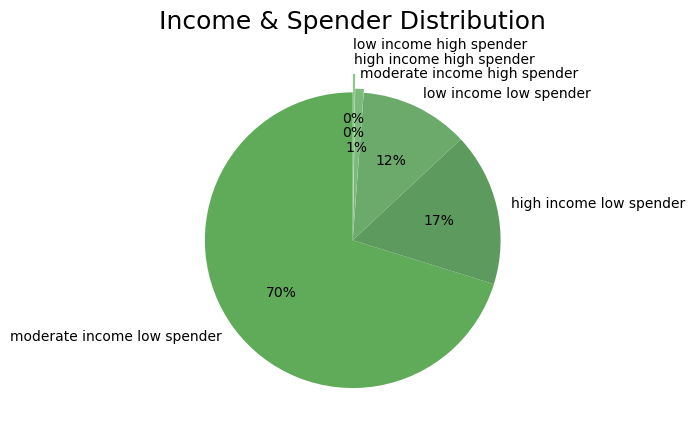

In [270]:
# creating pie chart to show profile distribution

income_spender_pie = generate_pie_chart(tdhr,'income_spender',income_spender_dict, explode=[0,0,0,.025,.125,.225], title_offset=1.05, title='Income & Spender')

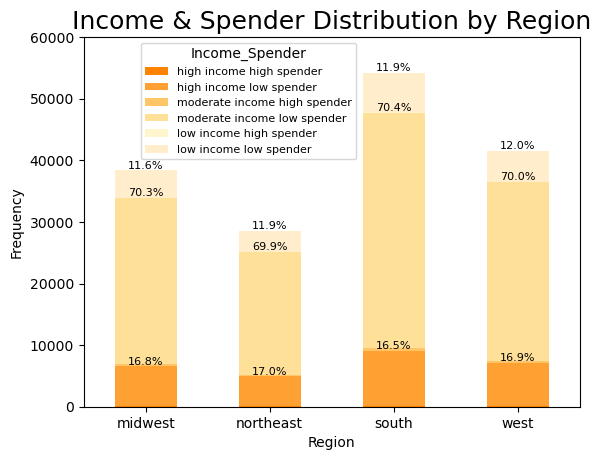

In [326]:
# creating a stacked bar chart

income_spender_stackedbar = generate_stacked_bar_chart(tdhr, 'region','income_spender',income_spender_dict, title = 'Income & Spender')

<AxesSubplot: title={'center': 'Income & Spender Distribution by Customer_Freq'}, xlabel='Customer_Freq', ylabel='Frequency'>

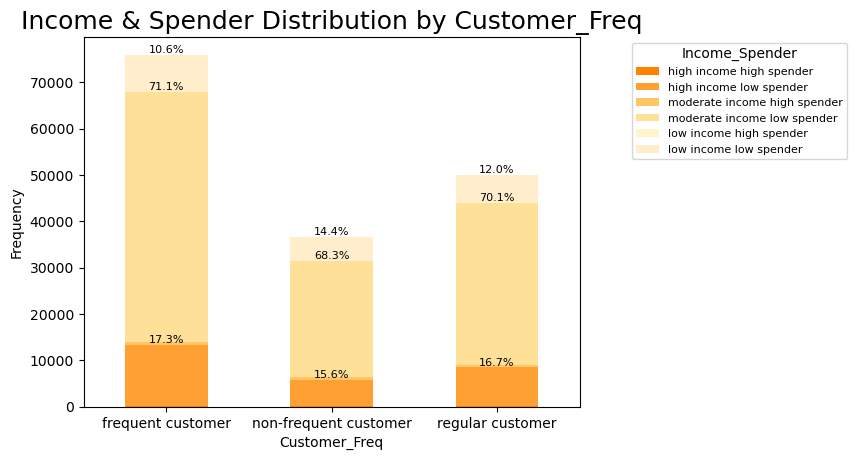

In [374]:
generate_stacked_bar_chart(tdhr, 'customer_freq','income_spender',income_spender_dict, title = 'Income & Spender')

##### pet owner

###### can't be sure that the user is a pet owner, since they might be buying it for someone else.

In [ ]:
# creating column to determine if user has bought pet food

tdhr['pet'] = (tdhr['department_id'].eq(8)
               .groupby(tdhr['user_id'])
               .transform(np.sum)
               .astype(int))


In [ ]:
# checking new column

tdhr.loc[(tdhr['user_id'] == 109) & (tdhr['department_id'] == 8)]

In [41]:
# creating data dictionary

pet_owner_dict = {
    0 : 'non pet owner',
    1 : 'pet owner',
}

In [42]:
# creating profile column

conditions = [
    (tdhr['pet'] > 0),
]

choices = [1]

tdhr['pet_owner'] = np.select(conditions, choices, default = 0)

/var/folders/6p/dg2x5f3j5clbf9xgg9xqfxjh0000gn/T/ipykernel_28094/2623702428.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdhr['pet_owner'] = np.select(conditions, choices, default = 0)


In [43]:
# checking column

tdhr['pet_owner'].value_counts()

0    27539023
1     3453641
Name: pet_owner, dtype: int64

In [44]:
# dropping pet column

tdhr = tdhr.drop(columns='pet', axis = 1)

In [174]:
# usage frequency and prices summary statistics for profile

(tdhr
    .groupby('pet_owner')
    .agg({'prices': {'mean','max','min'},
          'days_since_prior_order': {'mean','max','min'}})
    .rename(index=pet_owner_dict, level='pet_owner')
    )

prices                 days_since_prior_order                 
                 min   max      mean                    min   max       mean
pet_owner                                                                   
non pet owner    1.0  25.0  7.792809                    0.0  30.0  10.889901
pet owner        1.0  25.0  7.815260                    0.0  30.0  10.181882

** **

###### vizualizations

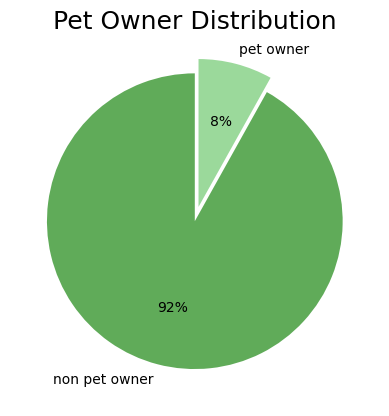

In [283]:
# creating visualization to show distribution

pet_owner_pie = generate_pie_chart(tdhr,'pet_owner',pet_owner_dict, explode=[0,0.1], title = 'Pet Owner')

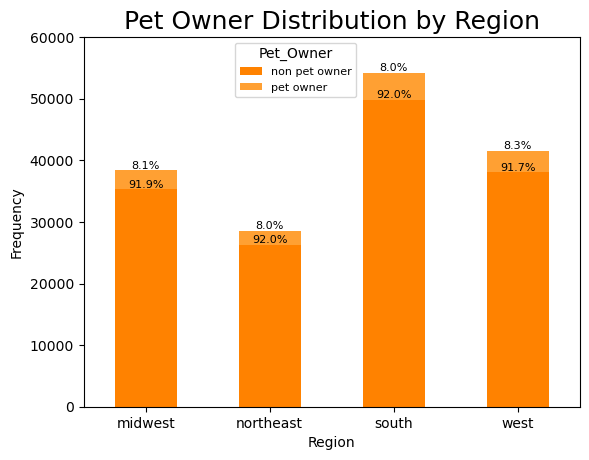

In [327]:
# generating stacked barchart

pet_owner_stackedbar = generate_stacked_bar_chart(tdhr,'region','pet_owner',pet_owner_dict, title = 'Pet Owner')

##### vegetarian

###### the user might use instacart solely to purchase vegetarian options

In [47]:
# creating column to determine if user has bought any meat or seafood

tdhr['meat'] = (tdhr['department_id'].eq(12)
               .groupby(tdhr['user_id'])
               .transform(np.sum)
               .astype(int))


In [50]:
# checking if column is correct

tdhr.loc[(tdhr['department_id'] == 12) & (tdhr['user_id'] == 110)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,average_price,spender_type,max_order,loyalty_flag,median_day_since_ordered,customer_freq,gender,state,age,date_joined,n_dependants,fam_status,income,region,household,age_gender,income_spender,pet_owner,meat
16541508,65254,110,15,5,14,9.0,28986,16,0,Mild Italian Chicken Sausage,106,12,12.1,mid-range product,regular days,most orders,7.435159,low spender,20,regular customer,18.0,regular customer,Female,Delaware,55,8/13/2019,3,married,168891,south,4,2,2,0,2
16541540,1402971,110,5,0,8,30.0,10017,13,0,Tilapia Filet,39,12,18.2,high-range product,busiest days,average orders,7.435159,low spender,20,regular customer,18.0,regular customer,Female,Delaware,55,8/13/2019,3,married,168891,south,4,2,2,0,2


In [51]:
# creating dictionary

vegetarian_dict = {
    0 : 'non vegetarian',
    1 : 'vegetarian',
}

In [52]:
# creating profile column

conditions = [
    (tdhr['meat'] == 0),
]

choices = [1]

tdhr['vegetarian'] = np.select(conditions, choices, default = 0)

In [53]:
# checking out new column

tdhr['vegetarian'].value_counts()

0    23085826
1     7906838
Name: vegetarian, dtype: int64

In [54]:
# dropping column thats no longer needed 

tdhr = tdhr.drop(columns= 'meat', axis=1)

In [175]:
# usage frequency and prices summary statistics for profile

(tdhr
    .groupby('vegetarian')
    .agg({'prices': {'mean','max','min'},
          'days_since_prior_order': {'mean','max','min'}})
    .rename(index=vegetarian_dict, level='vegetarian')
    )

prices                 days_since_prior_order                 
                  min   max      mean                    min   max       mean
vegetarian                                                                   
non vegetarian    1.0  25.0  7.905957                    0.0  30.0  10.562111
vegetarian        1.0  20.0  7.472255                    0.0  30.0  11.546818

** **

###### visualizations

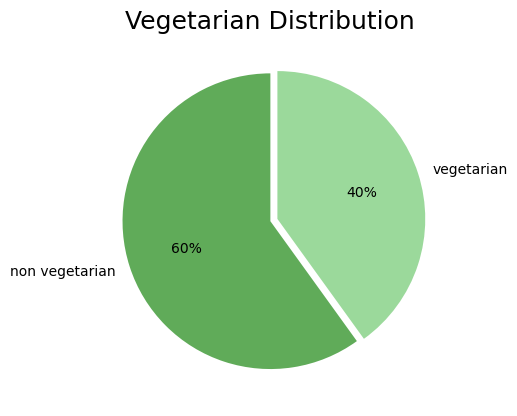

In [284]:
# creating a visualization to show distribution

vegetarian_pie = generate_pie_chart(tdhr,'vegetarian',vegetarian_dict, explode=[0,0.05])

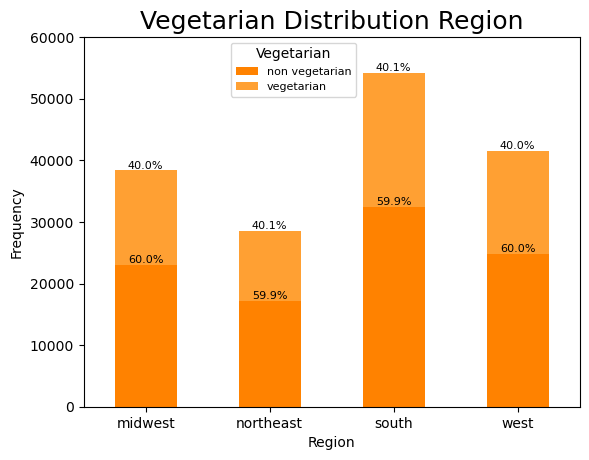

In [328]:
vegetarian_stackedbar = generate_stacked_bar_chart(tdhr,'region','vegetarian',vegetarian_dict)

### exporting data and visualizations

In [372]:
# exporting data 
path = r'/Users/johntam/cf_data_analysis/tasks/A4/code/clean_data'
tdhr.to_pickle(os.path.join(path,'tdhr.pkl'))

In [367]:
# exporting visualizations

path = r'/Users/johntam/cf_data_analysis/tasks/A4/code/visualizations'

# Create a dictionary to map each figure object to its desired filename
figure_names = {
    fig.get_figure(): name
    for name, fig in globals().items()
    if isinstance(fig, plt.Axes) and fig in [ # if instance helps to ensure that only axes objects are being included
        age_gender_pie, age_gender_stackedbar,
        household_pie, household_stackedbar,
        vegetarian_pie, vegetarian_stackedbar,
        income_spender_pie, income_spender_stackedbar,
        pet_owner_stackedbar, pet_owner_pie
    ]
}

# Save each figure as a PNG file in the directory with its corresponding filename
for fig, name in figure_names.items():
    fig.figure.savefig(os.path.join(path, f"{name}.png"))
    plt.close(fig)

# Close all figures
plt.close('all')